In [5]:
import numpy as np

# RMSProp
**RMSProp (Root Mean Square Propagation)** là một phương pháp tối ưu hóa trong machine learning được sử dụng để cải thiện hiệu quả của quá trình huấn luyện, đặc biệt là trong các mạng nơ-ron sâu. Phương pháp này được phát triển để giải quyết vấn đề mà Gradient Descent có thể gặp phải khi học chậm hoặc không ổn định, đặc biệt là trong các bài toán có sự thay đổi lớn về độ dốc (gradient).

## 1. Ý tưởng chính của RMSProp
RMSProp điều chỉnh tốc độ học (learning rate) cho từng tham số một cách thích hợp, giúp giảm thiểu vấn đề vanishing gradient (gradient quá nhỏ) hoặc exploding gradient (gradient quá lớn). Điểm đặc biệt của RMSProp là nó sử dụng trung bình động của bình phương gradient trước đó để điều chỉnh tốc độ học tại mỗi bước.

## 2. Công thức của RMSProp
RMSProp tính toán vận tốc (velocity) của gradient theo thời gian và điều chỉnh tốc độ học (learning rate) tại mỗi bước. Công thức cập nhật trọng số trong RMSProp như sau:

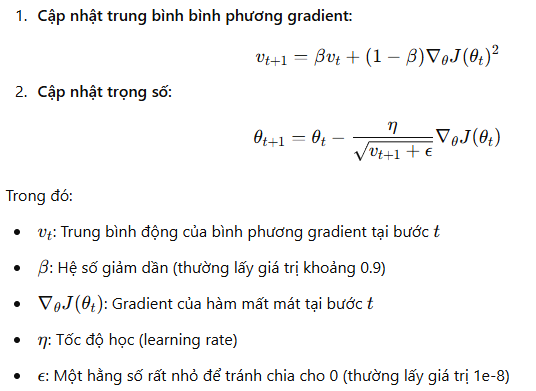

Cho function gồm hai biến như sau:

$f(w_1,w_2) = 0.1w_1^2 + 2w_2^2$

w1 = −5, w2 = −2, v1 = 0, v2 = 0, α = 0.3, 𝛽 = 0.9, ε = 10−6

với epoch = 2:


*   Bắt đầu với epoch = 1
*   **STEP1**: Tìm giá trị $dw_1$ và $dw_2$ giá trị đạo hàm của function theo $w_1$ và $w_2$

$dw_1 = 0.1 * 2 * w_1 = 0.1 * 2 * (-5) = -1$

$dw_2 = 2 * 2 * w_2 = 2 * 2 * (-2) = -8$

*   **STEP2**: Tìm giá trị $v_1$ và $v_2$ dựa vào $dw_1$ và $dw_2$ tìm được ở STEP1

$v_1 = 𝛽v_{t1-1} + (1 - 𝛽) * dw_1^2 = 0.9 * 0 + (1 - 0.9) * (-1)^2 = 0.1$

$v_2 = 𝛽v_{t2-1} + (1 - 𝛽) * dw_2^2 = 0.9 * 0 + (1 - 0.9) * (-8)^2 = 6.4$

*   **STEP3**: Dùng công thức (2.2) Gradient Descent + Momentum để cập nhật $w_1$ và $w_2$. Hoàn thành epoch = 1

$w_{1} = w_1 - α *  \displaystyle\frac{dw_1}{ \sqrt{v_1 + ϵ} } = -5 - 0.3 *  \displaystyle\frac{-1}{ \sqrt{0.1 + 10^{-6}} } $

$w_{2} = w_2 - α *  \displaystyle\frac{dw_2}{ \sqrt{v_2 + ϵ} } = -2 - 0.3 *  \displaystyle\frac{-8}{ \sqrt{6.4 + 10^{-6}} } $

*   **STEP4**: epoch = 2 ta thực hiện tương tự với STEP1, STEP2 và STEP3 như trên với $w_1$ và $w_2$ đã được cập nhật từ epoch = 1


In [6]:
def df_w(W):
  """
  Thực hiện tính gradient của dw1 và dw2
  Arguments:
  W -- np.array [w1, w2]
  Returns:
  dW -- np.array [dw1, dw2], array chứa giá trị đạo hàm theo w1 và w2

  """
  W = np.array(W)
  dW = np.zeros_like(W)
  dW[0] = 0.1 * 2 * W[0]
  dW[1] = 2 * 2 * W[1]
  return dW


In [16]:
def rmsprop(W, V, dW, lr, beta):
  eps = 1e-6
  V = beta * V + (1 - beta) * (dW ** 2)
  W = W - lr * dW / np.sqrt(V + eps)
  return W, V

In [17]:
def train_pl(optimizer, lr, epochs):
  # Initial point
  W = np.array([-5, -2], dtype=np.float32)
  V = np.zeros_like(W)
  beta = 0.9

  # list of results
  results = [W]

  for epoch in range(epochs):
    dW = df_w(W)
    W, V = optimizer(W, V, dW, lr, beta)
    results.append(W)

  return results

In [18]:
train_pl(rmsprop, 0.3, 30)

[array([-5., -2.], dtype=float32),
 array([-4.0513215, -1.0513167], dtype=float32),
 array([-3.4351976, -0.5915234], dtype=float32),
 array([-2.958937  , -0.32943937], dtype=float32),
 array([-2.5654628 , -0.17756478], dtype=float32),
 array([-2.2292054 , -0.09163253], dtype=float32),
 array([-1.9362674 , -0.04494496], dtype=float32),
 array([-1.6781766 , -0.02081422], dtype=float32),
 array([-1.4493496 , -0.00903558], dtype=float32),
 array([-1.2458818, -0.0036459], dtype=float32),
 array([-1.0649028 , -0.00135351], dtype=float32),
 array([-9.0420204e-01, -4.5644370e-04], dtype=float32),
 array([-7.6199627e-01, -1.3756263e-04], dtype=float32),
 array([-6.3677830e-01, -3.6259997e-05], dtype=float32),
 array([-5.2721506e-01, -8.1133439e-06], dtype=float32),
 array([-4.3207833e-01, -1.4747270e-06], dtype=float32),
 array([-3.5019833e-01, -2.0278264e-07], dtype=float32),
 array([-2.8043449e-01, -1.8422952e-08], dtype=float32),
 array([-2.2165969e-01, -7.6773077e-10], dtype=float32),
 arra